# Example of a possible EDA and linear regression on the Boston Housing Dataset

CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS - proportion of non-retail business acres per town.  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property-tax rate per 10,000  
PTRATIO - pupil-teacher ratio by town  
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
LSTAT - % lower status of the population  
MEDV - Median value of owner-occupied homes in $1000's  

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import warnings
warnings.filterwarnings("ignore")

In [32]:
file_path =  # add path to excel 

import pandas as pd
df = pd.read_csv(file_path, sep=r'\s+', header=None)

df.columns = ['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [34]:
print(df.shape)

(506, 14)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [36]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [37]:
any(df.duplicated())

False

# Univariate Analysis

In [38]:
# Check range

for column in df.columns:
        range = df[column].max() - df[column].min()
        print(f"Range of values for {column}: {range}")

Range of values for CRIM: 88.96988
Range of values for ZN: 100.0
Range of values for INDUS: 27.279999999999998
Range of values for CHAS: 1
Range of values for NOX: 0.486
Range of values for RM: 5.218999999999999
Range of values for AGE: 97.1
Range of values for DIS: 10.9969
Range of values for RAD: 23
Range of values for TAX: 524.0
Range of values for PTRATIO: 9.4
Range of values for B: 396.58
Range of values for LSTAT: 36.24
Range of values for MEDV: 45.0


In [39]:
# unique values

unique_per_column = df.nunique()
print(unique_per_column)

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64


In [40]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


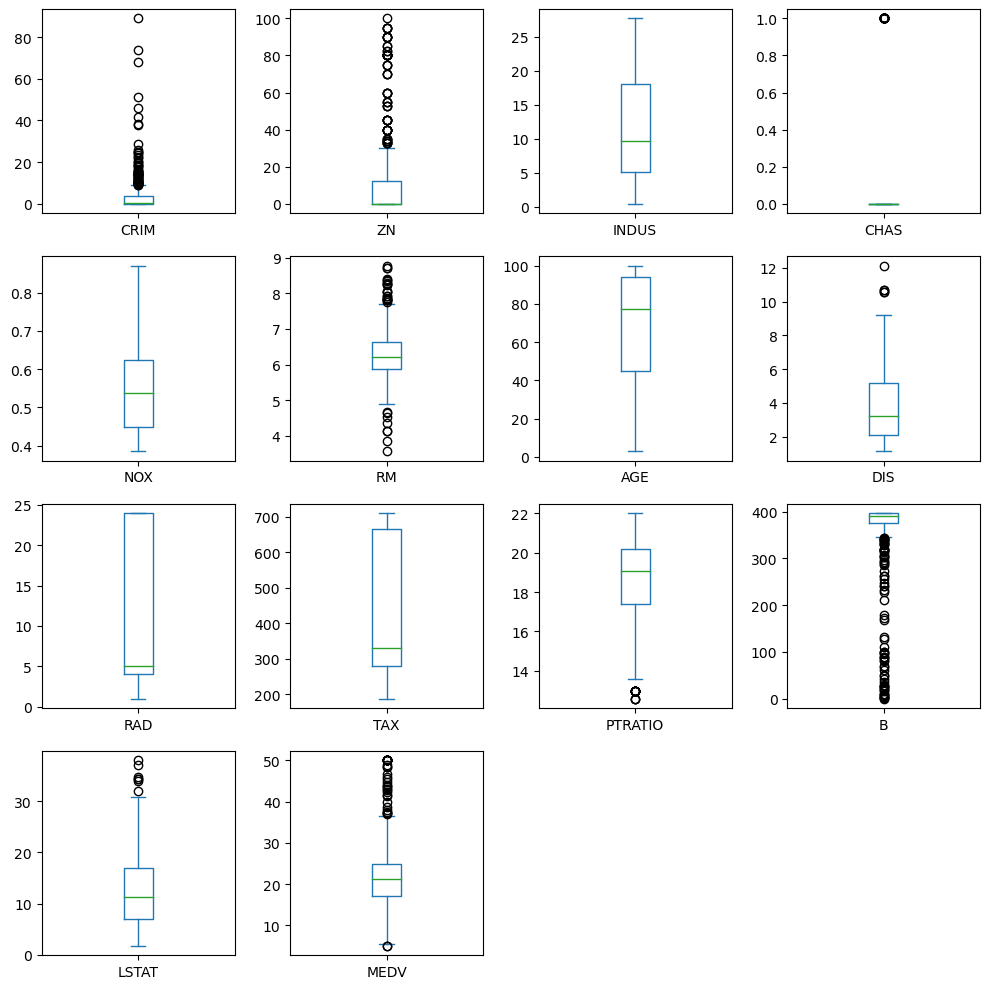

In [41]:
# Plotting boxplots
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(10, 10))
plt.tight_layout()
plt.show()


In [42]:
# Calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
small_outliers = (df < (Q1 - 1.5 * IQR))
big_outliers = (df > (Q3 + 1.5 * IQR))

# Count outliers
small_outliers_count = small_outliers.sum()
big_outliers_count = big_outliers.sum()

# Calculate total number of observations
total_observations = len(df)

# Calculate percentage of outliers
small_outliers_percentage = (small_outliers_count / total_observations) * 100
big_outliers_percentage = (big_outliers_count / total_observations) * 100

# Print the percentage of outliers for each column
print("Percentage of small outliers:")
print(small_outliers_percentage)
print("\nPercentage of big outliers:")
print(big_outliers_percentage)

Percentage of small outliers:
CRIM        0.000000
ZN          0.000000
INDUS       0.000000
CHAS        0.000000
NOX         0.000000
RM          1.581028
AGE         0.000000
DIS         0.000000
RAD         0.000000
TAX         0.000000
PTRATIO     2.964427
B          15.217391
LSTAT       0.000000
MEDV        0.395257
dtype: float64

Percentage of big outliers:
CRIM       13.043478
ZN         13.438735
INDUS       0.000000
CHAS        6.916996
NOX         0.000000
RM          4.347826
AGE         0.000000
DIS         0.988142
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           0.000000
LSTAT       1.383399
MEDV        7.509881
dtype: float64


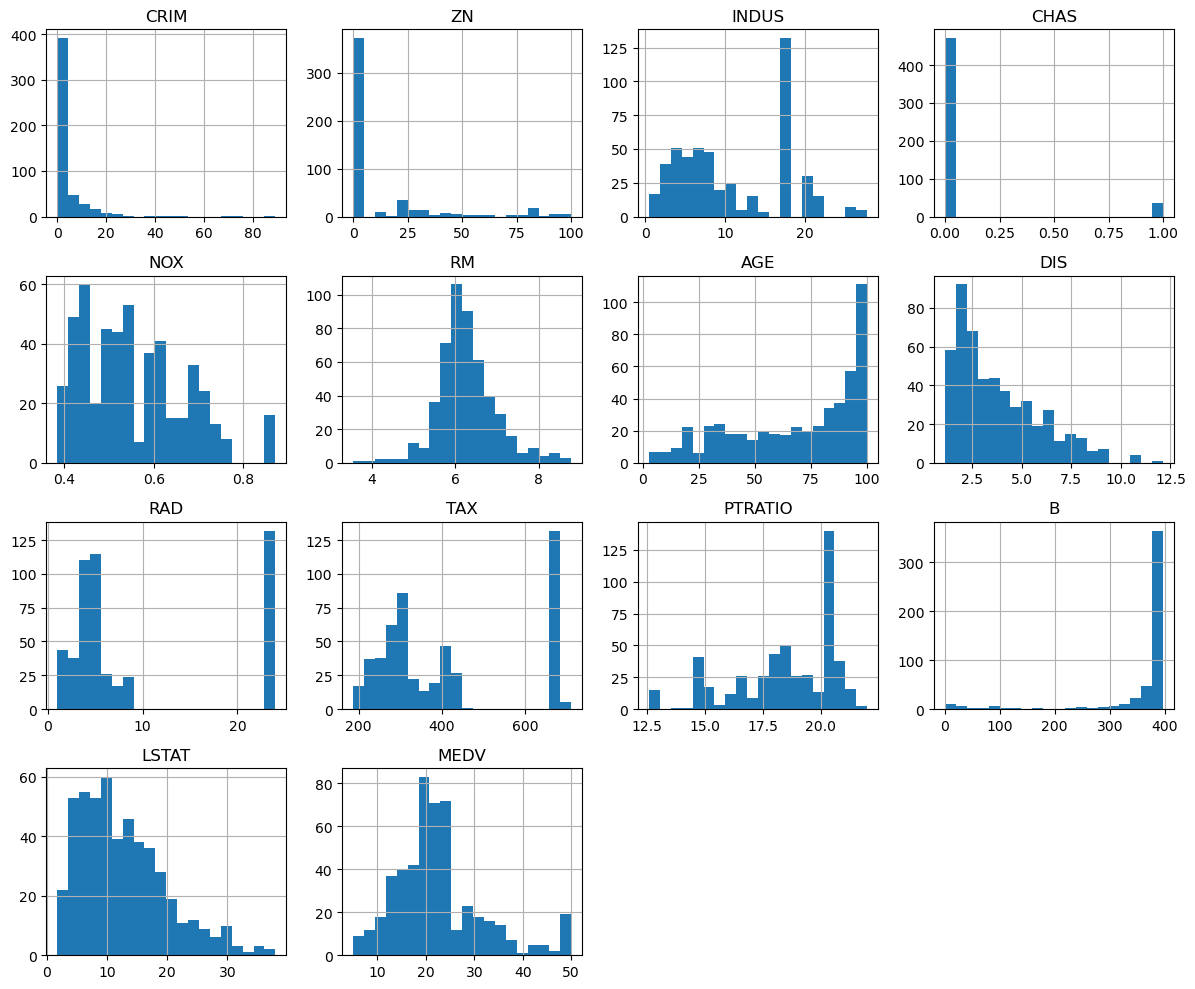

In [43]:
# Plot histograms

df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Multivariate Analysis

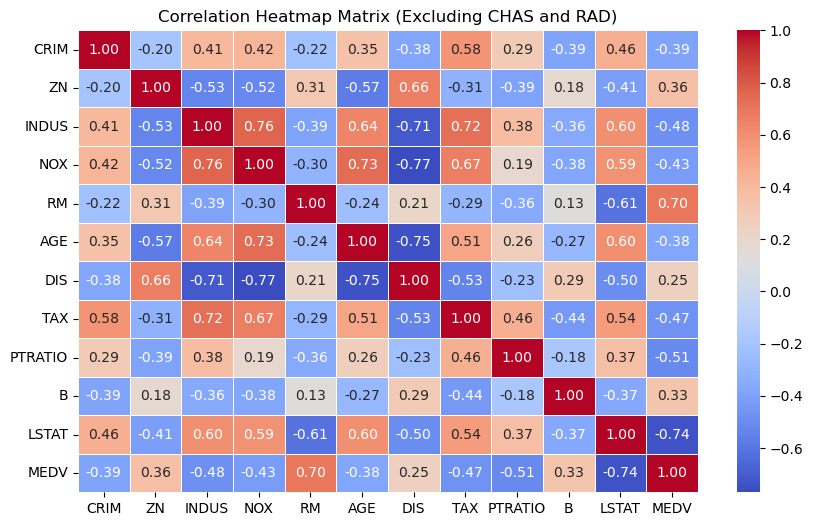

In [44]:
# Pearson Correlation Heatmap

correlation_matrix_without_chas_rad = df.drop(columns=['CHAS', 'RAD']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_without_chas_rad, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Matrix (Excluding CHAS and RAD)')
plt.show()

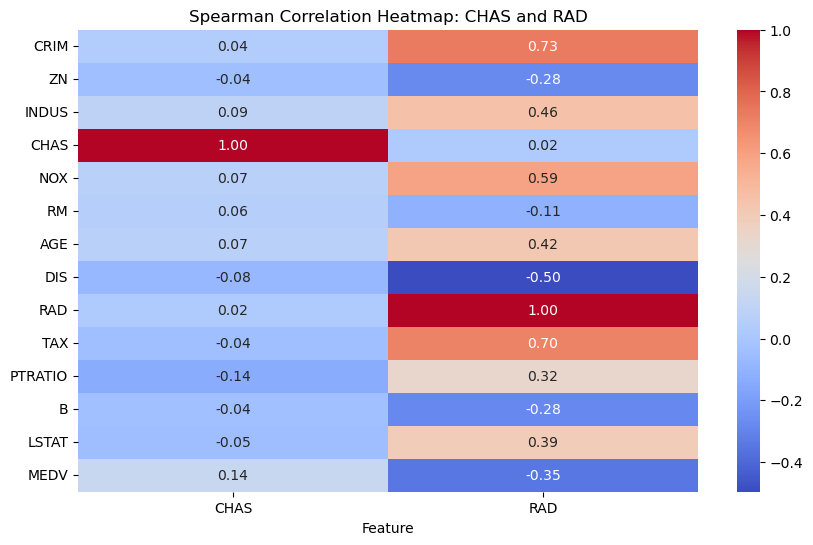

In [45]:
#  Spearman Correlation Heatmap

spearman_corr = df.corr(method='spearman')

chas_rad_corr = spearman_corr[['CHAS', 'RAD']]

plt.figure(figsize=(10, 6))
sns.heatmap(chas_rad_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap: CHAS and RAD')
plt.xlabel('Feature')
plt.show()

# Fit a predictor




In [46]:
# various models on original df

# Create a train-test split 
X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define columns to use
features = ['LSTAT', 'RM', 'PTRATIO']

# Define the pipeline
pipelines = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Lasso Regression': make_pipeline(StandardScaler(), Lasso()),
    'Ridge Regression': make_pipeline(StandardScaler(), Ridge()),
    'ElasticNet Regression': make_pipeline(StandardScaler(), ElasticNet())
}
    
for name, pipeline in pipelines.items():
    cv_results = cross_validate(pipeline, X_train[features], y_train, scoring=['neg_mean_squared_error'], cv=5, return_train_score=True)
    print(f"Results for {name}:")
    print("Train MSE:", -np.mean(cv_results['train_neg_mean_squared_error']))
    print("Test MSE:", -np.mean(cv_results['test_neg_mean_squared_error']))
    print()

Results for Linear Regression:
Train MSE: 27.105528584350782
Test MSE: 28.441328492759794

Results for Lasso Regression:
Train MSE: 28.721635280158136
Test MSE: 30.073088960248697

Results for Ridge Regression:
Train MSE: 27.105704909268287
Test MSE: 28.433955101491243

Results for ElasticNet Regression:
Train MSE: 31.625759941287402
Test MSE: 32.38920963775211



In [47]:
# Applying log transformation x2 to MEDV

df['MEDV']=np.log(df['MEDV'])
df['MEDV']=np.log(df['MEDV'])

In [48]:
# MEDV double log transformation

# Create a train-test split 
X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define columns to use
features = ['LSTAT', 'RM', 'PTRATIO']

# Define the pipeline
pipelines = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Lasso Regression': make_pipeline(StandardScaler(), Lasso()),
    'Ridge Regression': make_pipeline(StandardScaler(), Ridge()),
    'ElasticNet Regression': make_pipeline(StandardScaler(), ElasticNet())
}

for name, pipeline in pipelines.items():
    cv_results = cross_validate(pipeline, X_train[features], y_train, scoring=['neg_mean_squared_error'], cv=5, return_train_score=True)
    print(f"Results for {name}:")
    print("Train MSE:", -np.mean(cv_results['train_neg_mean_squared_error']))
    print("Test MSE:", -np.mean(cv_results['test_neg_mean_squared_error']))
    print()

Results for Linear Regression:
Train MSE: 0.006211821484536081
Test MSE: 0.00631589440049313

Results for Lasso Regression:
Train MSE: 0.020270230045851288
Test MSE: 0.02029383457786512

Results for Ridge Regression:
Train MSE: 0.006211922780528357
Test MSE: 0.006315392566108513

Results for ElasticNet Regression:
Train MSE: 0.020270230045851288
Test MSE: 0.02029383457786512



In [49]:
# Fit Linear Regression, get results and coeficients

# Fit the Linear Regression model to the training data
linear_regression_pipeline = pipelines['Linear Regression']
linear_regression_pipeline.fit(X_train[features], y_train)

# Predictions on training and test sets
y_train_pred = linear_regression_pipeline.predict(X_train[features])
y_test_pred = linear_regression_pipeline.predict(X_test[features])

# Compute MSE for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Linear Regression Model Results:")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Coefficients of the Linear Regression model
coefficients = linear_regression_pipeline.named_steps['linearregression'].coef_
intercept = linear_regression_pipeline.named_steps['linearregression'].intercept_

print("\nCoefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")

print("\nIntercept:", intercept)


Linear Regression Model Results:
Train MSE: 0.006222461575781926
Test MSE: 0.006272953654998803

Coefficients:
LSTAT: -0.09193440957709208
RM: 0.019329438089335883
PTRATIO: -0.02829409696715486

Intercept: 1.103816624151369
